In [7]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from pandasql import sqldf
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.line_width', 5000)
pd.set_option('display.max_columns', 60)
%matplotlib inline
q = lambda q: sqldf(q, globals())
from sklearn.metrics import mean_squared_error
from sklearn import linear_model, neighbors, tree, svm, ensemble
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets
mpl.rcParams['figure.figsize'] = (15.0, 5.0)
pd.options.display.html.table_schema = True
pd.options.display.max_rows = None

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['y'] = iris.target
df['y'] = df['y'].apply(lambda x: str(x))
df

line_width has been deprecated, use display.width instead (currently both are
identical)



/Users/peterjmyers/Work/commons/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


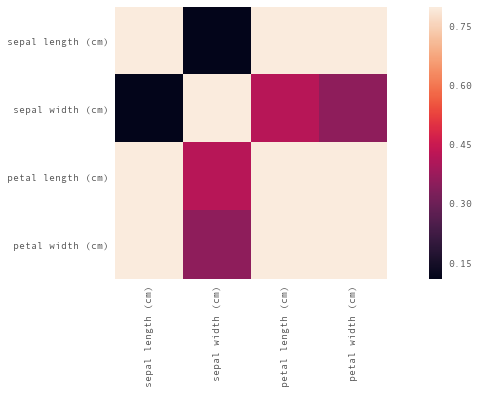

In [8]:
cor_mat = df.corr().apply(lambda x: abs(x))
sns.heatmap(cor_mat, vmax=.8, square=True)

/Users/peterjmyers/Work/commons/venv/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/peterjmyers/Work/commons/venv/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/peterjmyers/Work/commons/venv/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


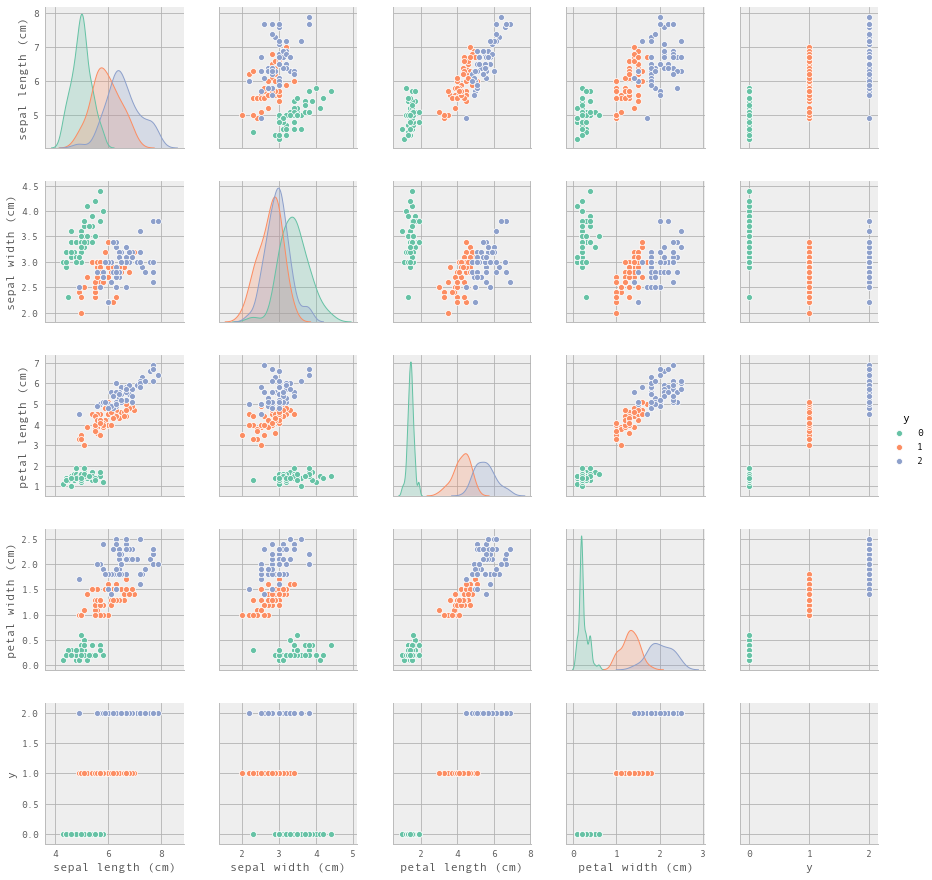

In [9]:
sns.pairplot(df, hue="y", palette="Set2", diag_kind="kde", size=2.5)

/Users/peterjmyers/Work/commons/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


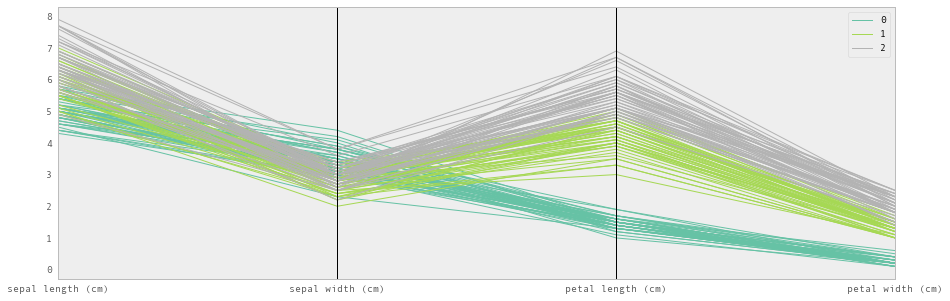

In [10]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df, 'y', colormap=plt.get_cmap("Set2"))